In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import change_data_type
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly
from emosent import get_emoji_sentiment_rank


Read data scraped in twitter

In [2]:
data1 = pd.read_pickle("twitter_keyword_tesla_21185 .pkl")
test_keyword = 'tesla'
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21185 entries, 0 to 21184
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  21185 non-null  object
 1   UserName        21185 non-null  object
 2   Timestamp       21185 non-null  object
 3   Text            21185 non-null  object
 4   Embedded_text   21185 non-null  object
 5   Emojis          21185 non-null  object
 6   Comments        21185 non-null  object
 7   Likes           21185 non-null  object
 8   Retweets        21185 non-null  object
 9   Image link      21185 non-null  object
 10  Tweet URL       21185 non-null  object
 11  Keyword         21185 non-null  object
dtypes: object(12)
memory usage: 1.9+ MB


Change data type for analytics

In [3]:
data1['Timestamp'] = data1[['Timestamp']].astype('datetime64')
data1['Likes'] = data1['Likes'].apply(change_data_type.fix_numbers)
data1['Retweets'] = data1['Retweets'].apply(change_data_type.fix_numbers)
data1['Comments'] = data1['Comments'].apply(change_data_type.fix_numbers)

Analytics Timestamp by month

C:\Users\SUMNWS\AppData\Local\Temp\ipykernel_1284\1033191214.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1.groupby(data1["Timestamp"].dt.month)['Likes','Comments','Retweets'].mean().plot(title='Count by month',xlabel='Month(1-12)',ylabel='Count')


<AxesSubplot: title={'center': 'Count by month'}, xlabel='Month(1-12)', ylabel='Count'>

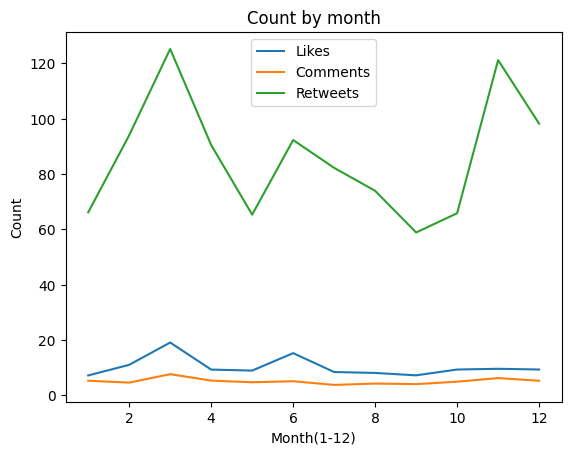

In [4]:
data1.groupby(data1["Timestamp"].dt.month)['Likes','Comments','Retweets'].mean().plot(title='Count by month',xlabel='Month(1-12)',ylabel='Count')

Analytics Timestamp by weekday

C:\Users\SUMNWS\AppData\Local\Temp\ipykernel_8324\243883682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1.groupby(data1["Timestamp"].dt.weekday)['Likes','Comments','Retweets'].mean().plot(title='Count by weekday',xlabel='Weekday(Mon-Sun)',ylabel='Count')


<AxesSubplot: title={'center': 'Count by weekday'}, xlabel='Weekday(Mon-Sun)', ylabel='Count'>

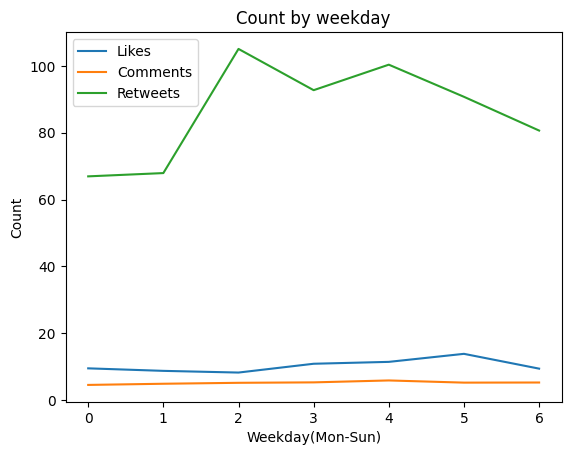

In [8]:
data1.groupby(data1["Timestamp"].dt.weekday)['Likes','Comments','Retweets'].mean().plot(title='Count by weekday',xlabel='Weekday(Mon-Sun)',ylabel='Count')

Analytics Timestamp by day

C:\Users\SUMNWS\AppData\Local\Temp\ipykernel_8324\258695337.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1.groupby(data1["Timestamp"].dt.day)['Likes','Comments','Retweets'].mean().plot(title='Count by day',xlabel='Day(1-31)',ylabel='Count')


<AxesSubplot: title={'center': 'Count by day'}, xlabel='Day(1-31)', ylabel='Count'>

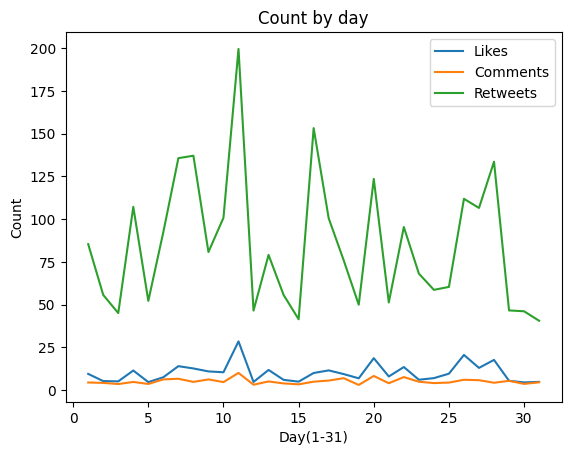

In [9]:
data1.groupby(data1["Timestamp"].dt.day)['Likes','Comments','Retweets'].mean().plot(title='Count by day',xlabel='Day(1-31)',ylabel='Count')

Analytics Timestamp by hour

C:\Users\SUMNWS\AppData\Local\Temp\ipykernel_8324\1203991124.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1.groupby(data1["Timestamp"].dt.hour)['Likes','Comments','Retweets'].mean().plot(title='Count by Hour',xlabel='Hour(1-24)',ylabel='Count')


<AxesSubplot: title={'center': 'Count by Hour'}, xlabel='Hour(1-24)', ylabel='Count'>

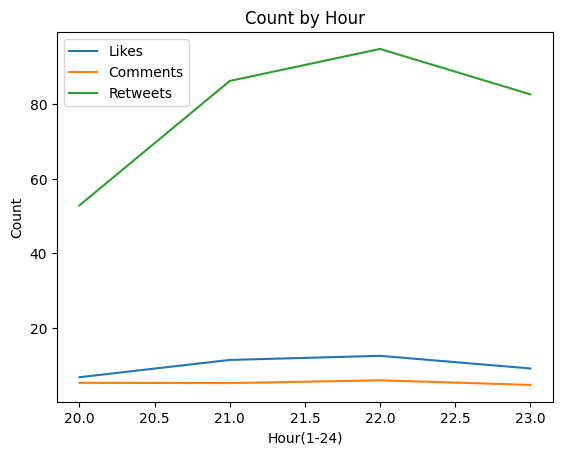

In [10]:
data1.groupby(data1["Timestamp"].dt.hour)['Likes','Comments','Retweets'].mean().plot(title='Count by Hour',xlabel='Hour(1-24)',ylabel='Count')

Count post content that mentioned test_keyword

In [11]:
data1["Embedded_text"].str.contains(test_keyword).value_counts()

False    18941
True      2244
Name: Embedded_text, dtype: int64

<AxesSubplot: title={'center': "Contains 'tesla'"}, xlabel='False=Not mentioned, True=Mentioned', ylabel='Times'>

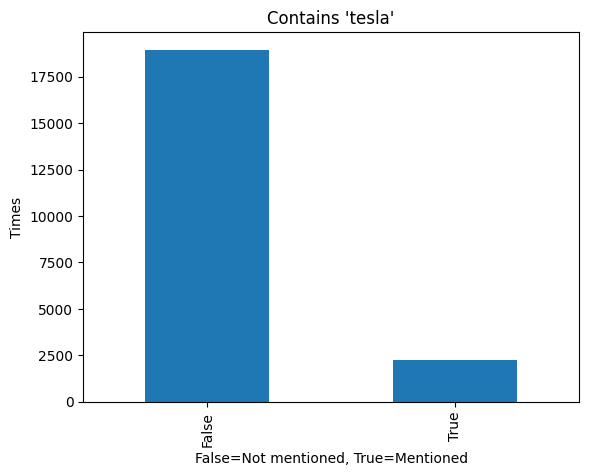

In [17]:
data1["Embedded_text"].str.contains(test_keyword).value_counts().plot(kind='bar',title="Contains '"+test_keyword+"'",xlabel='False=Not mentioned, True=Mentioned',ylabel='Times')

Analytics Emojis

In [13]:
# tesla_df['Emojis']

emoji_list = []
for i in data1['Emojis']:
    x = i.split()
    # print(x)
    
    try:
        for y in x:
            # print(y)
            emoji_list.append(y)
    except:
        pass
# print(emoji_list)

sentiment_score = []

for y in emoji_list:
    # print(y)
    try:
        z = get_emoji_sentiment_rank(y)
        sentiment_score.append(z['sentiment_score'])
    except:
        sentiment_score.append(0)
    
# print(len(sentiment_score))

emoji_count_list = {'emoji':'count'}
count_dic = []
for emoji_unique in emoji_list:
    emoji_count =  emoji_list.count(emoji_unique)
    count_dic.append(emoji_count)

emoji_count_list['emoji'] = emoji_list
emoji_count_list['count'] = count_dic

# print(emoji_count_list)
emoji_count_df = pd.DataFrame(emoji_count_list)
# emoji_count_df.info()

emoji_count_df['sentiment_score'] = sentiment_score
# print(emoji_count_df)

# Emoji data frame to Chart
fig = go.Figure()
fig.add_trace(go.Scatter(y=(emoji_count_df['sentiment_score']),
                x=emoji_count_df['count'],
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emoji_count_df['emoji'],
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=30),
                ))

fig.update_yaxes(title='score')
fig.update_xaxes(title='count')

fig.update_layout(
    template='simple_white', 
    yaxis_range=[-1,1.2],
    height=1000, width = 800,
    title="Emoji distribution",
    title_x=0.5)